## Code from Week #5 Video Lesson 

In [1]:
# Upload file to Google Drive, then save filepath

# NOTE: you'll need to change this variable to match your own filepath
filepath = 'data/El_Nino_text_data.txt'

In [2]:
# Load file into Jupyter\
import numpy as np

years = np.genfromtxt(filepath,skip_header=1,skip_footer=5,usecols=0,dtype=int,delimiter=None)
print(years.shape) # Check dimensions of the years NumPy array

data = np.genfromtxt(filepath,skip_header=1,skip_footer=5,usecols=range(1,13),dtype=float,delimiter=None)
print(data.shape)  # Check dimensions of the data NumPy array
print(data)  # Get a preview of the data by printing

(151,)
(151, 12)
[[ 25.58  25.57  26.43 ...  25.82  25.86  25.79]
 [ 26.33  26.18  26.83 ...  26.4   26.35  26.01]
 [ 25.86  26.14  26.76 ...  25.79  25.86  25.71]
 ...
 [ 25.72  26.03  26.53 ...  27.57  27.65  27.56]
 [ 27.09  27.38  28.06 ...  27.29  27.39  27.1 ]
 [ 27.22  27.25  27.62 ... -99.99 -99.99 -99.99]]


In [3]:
# Mask out the missing data using np.NaN (a placeholder)
data[data == -99.99] = np.NaN

# Check updated array
print(data)

[[25.58 25.57 26.43 ... 25.82 25.86 25.79]
 [26.33 26.18 26.83 ... 26.4  26.35 26.01]
 [25.86 26.14 26.76 ... 25.79 25.86 25.71]
 ...
 [25.72 26.03 26.53 ... 27.57 27.65 27.56]
 [27.09 27.38 28.06 ... 27.29 27.39 27.1 ]
 [27.22 27.25 27.62 ...   nan   nan   nan]]


In [4]:
# Reshape from 2D to 1D, because the data is a time series
data_1d = np.reshape(data,(data.size,))
print(data_1d)

# Alternate way of reshaping a 2D array to a 1D array
data_1d = data.flatten()
print(data_1d)

[25.58 25.57 26.43 ...   nan   nan   nan]
[25.58 25.57 26.43 ...   nan   nan   nan]


In [5]:
# Construct 1-D time array (for x-values, because we plot x-values vs. y-values)
# We want it to look like this:
# [ January 15, 1870,
#   February 15, 1870,
#   March 15, 1870,
#   ...
#   November 15, 2020,
#   December 15, 2020 ]
from datetime import datetime

all_months = np.tile(range(1,13),len(years))
# print(all_months)

all_years = np.repeat(range(1870,2021),12)
# print(all_years)

datetimes = [datetime(all_years[idx],all_months[idx],15) for idx in range(data.size)]
datetimes = np.array(datetimes)   # Because we prefer arrays, not lists
print(datetimes)

[datetime.datetime(1870, 1, 15, 0, 0) datetime.datetime(1870, 2, 15, 0, 0)
 datetime.datetime(1870, 3, 15, 0, 0) ...
 datetime.datetime(2020, 10, 15, 0, 0)
 datetime.datetime(2020, 11, 15, 0, 0)
 datetime.datetime(2020, 12, 15, 0, 0)]


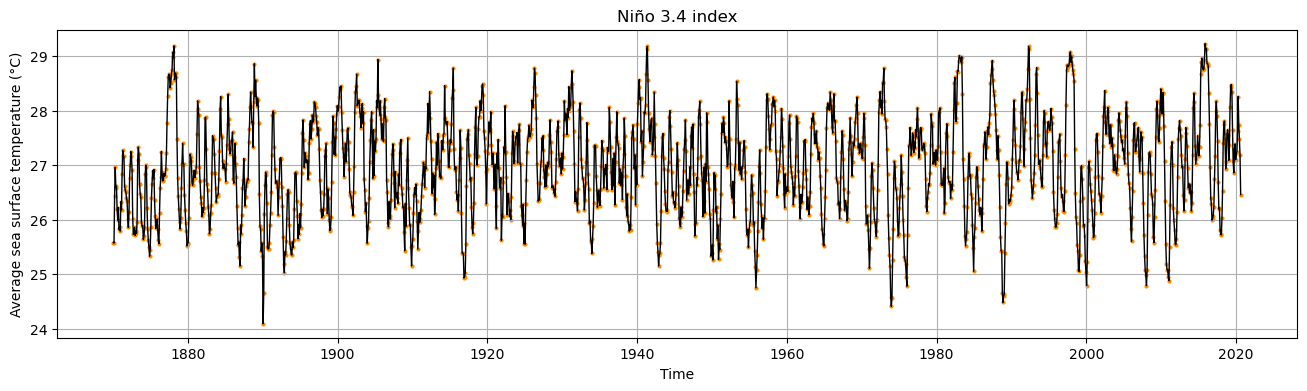

In [6]:
# Plot the El Niño index
import matplotlib.pyplot as plt

plt.subplots(figsize=(16,4))
plt.plot(datetimes,data_1d,color='k',lw=1)   # color options: https://matplotlib.org/3.3.2/gallery/color/named_colors.html
plt.scatter(datetimes,data_1d,s=4,c='darkorange')
plt.title('Niño 3.4 index')
plt.xlabel('Time')
plt.ylabel('Average sea surface temperature (°C)')
plt.grid()

# Live Demo Code

### In-class live coding, October 24th

Note that we care about the state of El Niño in the Pacific Northwest because it affects our weather. For instance, we're currently predicted to be in an El Niño state, which tends to bring warmer, less rainy weather to Seattle:

https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/enso_advisory/ensodisc.shtml

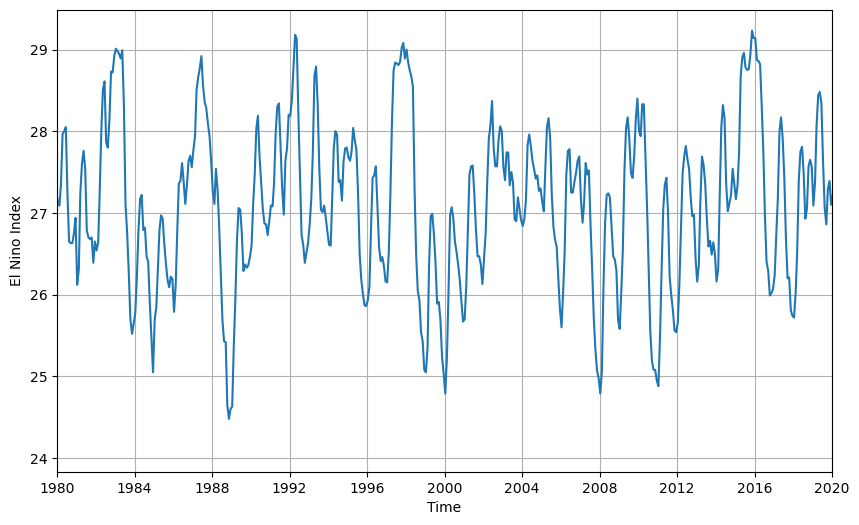

In [11]:
# Goal: zoom into just a portion of the x-axis (years 1980-2020)
# color options: https://matplotlib.org/3.3.2/gallery/color/named_colors.html
fig, axs=plt.subplots(figsize=(10,6))
x=datetimes
y=data_1d
# set range of xaxis
axs.set_xlim(datetime(1980,1,1), datetime(2020,1,1))
axs.plot(x,y)
axs.grid()
axs.set_xlabel('Time')
axs.set_ylabel('El Nino Index')
plt.show()

In [16]:
# Calculate average value of El Niño index, ignoring NaN values
sum_nino = 0
nan_counter = 0
# loop through each item in my data array
for value in data_1d:
    # check if value is nan
    if np.isnan(value):
        print('found a nan value')
        nan_counter +=1
    else:
        sum_nino += value
print(sum_nino)
# calculate average 
avg_nino = sum_nino / (len(data_1d)-nan_counter)
print(avg_nino)

# Round to one decimal place
print("rounded average: ",np.round(avg_nino,1))


found a nan value
found a nan value
found a nan value
found a nan value
48753.1600000001
26.965243362831913
rounded average:  27.0


In [18]:
# Calculate average value of El Niño index using NumPy
avg_nino1 = np.mean(data_1d)
print(avg_nino1)

avg_nino2 = np.nanmean(data_1d)
print(avg_nino2)

nan
26.96524336283186


In [20]:
# Shift El Niño index values down by the average temperature, so they're centered at y = 0
data_1d_shifted = data_1d.copy()

# loop through each index in data_1d
for index in range(len(data_1d)):
    data_1d_shifted[index]= data_1d_shifted[index]-avg_nino2

print(data_1d_shifted)

[-1.38524336 -1.39524336 -0.53524336 ...         nan         nan
         nan]


Text(0.5, 1.0, 'El Nino Time Series')

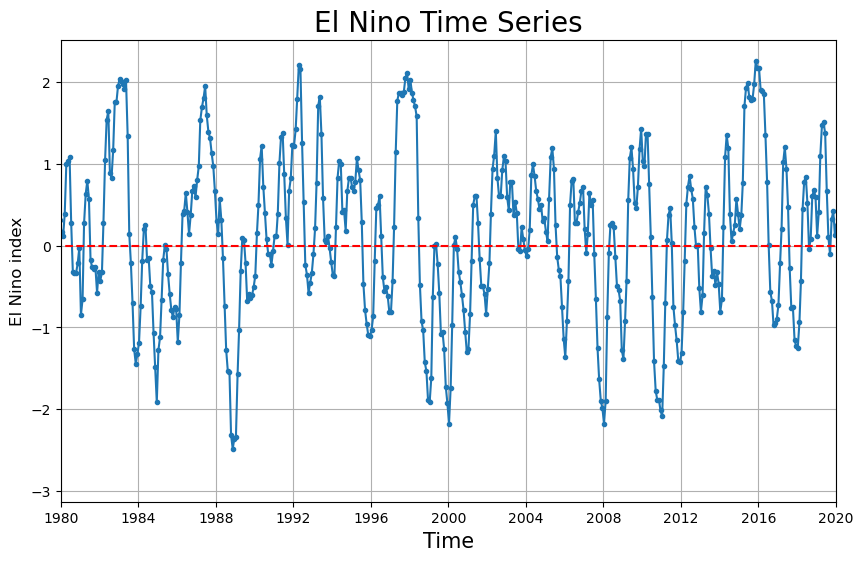

In [35]:
# Plot shifted data. Add a horizontal line at y = 0
fig,axs=plt.subplots(figsize=(10,6))
# specify data to plot
x=datetimes
y=data_1d_shifted
axs.plot(x,y, marker='.')
axs.plot([datetimes[0], datetimes[-1]],[0,0], c='red', linestyle='--')
axs.set_xlim(datetime(1980, 1,1), datetime(2020,1,1))
axs.grid()
axs.set_xlabel('Time', fontsize=15)
axs.set_ylabel('El Nino index', fontsize=12)
axs.set_title('El Nino Time Series', fontsize=20)